# 🌿 Classificação de Espécies de Flores com KNN (K-Nearest Neighbors) + Validação Cruzada

## 📌 Sobre o Dataset Iris
O **Iris Dataset** é amplamente utilizado para testes de classificação em Machine Learning. Ele contém medições de três espécies de flores do gênero *Iris* (**Setosa**, **Versicolor** e **Virginica**).  

As medições incluem:  
- 📏 **Comprimento da sépala** (cm)  
- 📏 **Largura da sépala** (cm)  
- 🌿 **Comprimento da pétala** (cm)  
- 🌿 **Largura da pétala** (cm)  

O objetivo do modelo é prever a espécie da flor com base nessas características.

---

## 🚀 O que o código faz?
Este código implementa um modelo **KNN (K-Nearest Neighbors)** com **validação cruzada** para otimizar a escolha do melhor valor de **K**.  

🔹 **Carrega os dados do Iris Dataset**  
🔹 **Divide os dados em treino e teste** (80/20)  
🔹 **Usa validação cruzada para encontrar o melhor valor de K**  
🔹 **Treina um modelo KNN** com o melhor valor de K encontrado  
🔹 **Avalia o modelo** com métricas como acurácia, relatório de classificação e matriz de confusão  

---

## 🛠️ Como funciona o código?
O código está estruturado com funções para facilitar a compreensão:

1️⃣ **`carregar_dataset()`** → Carrega e exibe as primeiras linhas do dataset  
2️⃣ **`dividir_dados(X, y)`** → Divide os dados em treino e teste  
3️⃣ **`encontrar_melhor_k(X_train, y_train)`** → Testa diferentes valores de K com validação cruzada  
4️⃣ **`treinar_knn(X_train, y_train, k)`** → Treina o modelo KNN com o melhor valor de K  
5️⃣ **`avaliar_modelo(modelo, X_test, y_test, target_names)`** → Avalia o desempenho do modelo  

---

## 📊 Avaliação do Modelo
Após o treinamento, o código exibe:  

✔ **Acurácia** do modelo  
✔ **Relatório de classificação** (Precisão, Recall, F1-Score)  
✔ **Matriz de confusão** visualizada com `seaborn`  
✔ **Gráfico da escolha do melhor K com validação cruzada**  

📌 *Matriz de Confusão Gerada:*  
🔵 Azul = Classificações corretas  
⚪ Branco = Erros do modelo  

---

## 🔧 Requisitos
Antes de rodar o código, instale as dependências necessárias:

```bash
pip install numpy pandas scikit-learn seaborn matplotlib


📌 Primeiras 5 linhas do dataset Iris:

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0   



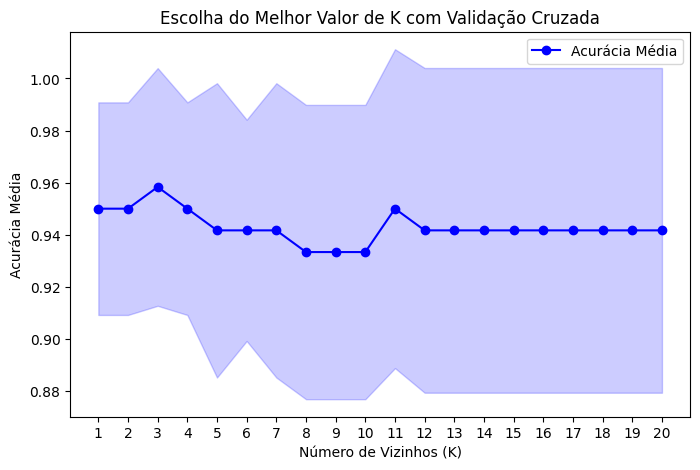

🔍 Melhor valor de K encontrado: 3

✅ Acurácia do modelo: 1.00

📊 Relatório de Classificação:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



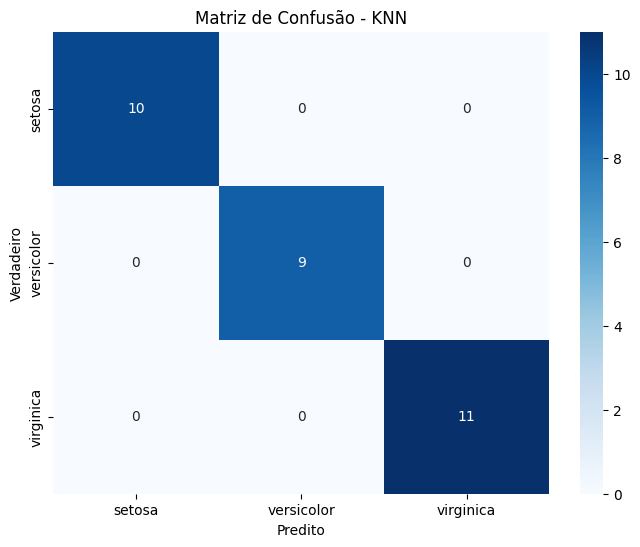

In [2]:
# Importando as bibliotecas necessárias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 🔹 Função para carregar e visualizar o dataset Iris
def carregar_dataset():
    iris = load_iris()
    df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
    df_iris['target'] = iris.target
    print("📌 Primeiras 5 linhas do dataset Iris:\n")
    print(df_iris.head(), "\n")
    return iris, df_iris

# 🔹 Função para dividir os dados em treino e teste
def dividir_dados(X, y, test_size=0.2, random_state=42):
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

# 🔹 Função para encontrar o melhor valor de K com validação cruzada
def encontrar_melhor_k(X_train, y_train):
    k_values = range(1, 21)
    scores = []
    std_scores = []

    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        cv_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
        scores.append(cv_scores.mean())
        std_scores.append(cv_scores.std())

    melhor_k = k_values[np.argmax(scores)]

    # Gráfico da variação da acurácia para diferentes valores de K
    plt.figure(figsize=(8, 5))
    plt.plot(k_values, scores, marker='o', linestyle='-', color='b', label="Acurácia Média")
    plt.fill_between(k_values, np.array(scores) - np.array(std_scores), np.array(scores) + np.array(std_scores), color='blue', alpha=0.2)
    plt.xlabel("Número de Vizinhos (K)")
    plt.ylabel("Acurácia Média")
    plt.title("Escolha do Melhor Valor de K com Validação Cruzada")
    plt.xticks(k_values)
    plt.legend()
    plt.show()

    print(f"🔍 Melhor valor de K encontrado: {melhor_k}\n")
    return melhor_k

# 🔹 Função para treinar o modelo KNN
def treinar_knn(X_train, y_train, k):
    modelo = KNeighborsClassifier(n_neighbors=k)
    modelo.fit(X_train, y_train)
    return modelo

# 🔹 Função para avaliar o modelo
def avaliar_modelo(modelo, X_test, y_test, target_names):
    y_pred = modelo.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"✅ Acurácia do modelo: {accuracy:.2f}\n")

    print("📊 Relatório de Classificação:")
    print(classification_report(y_test, y_pred, target_names=target_names))

    # Matriz de confusão
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
    plt.xlabel("Predito")
    plt.ylabel("Verdadeiro")
    plt.title("Matriz de Confusão - KNN")
    plt.show()

# 🚀 Fluxo principal do código
if __name__ == "__main__":
    # Carregando o dataset
    iris, df_iris = carregar_dataset()
    X, y = iris.data, iris.target
    
    # Dividindo os dados
    X_train, X_test, y_train, y_test = dividir_dados(X, y)
    
    # Encontrando o melhor valor de K com validação cruzada
    melhor_k = encontrar_melhor_k(X_train, y_train)
    
    # Treinando o modelo com o melhor K
    modelo_knn = treinar_knn(X_train, y_train, melhor_k)
    
    # Avaliando o modelo
    avaliar_modelo(modelo_knn, X_test, y_test, iris.target_names)
